Aprendendo um pouco sobre Cluster utilizando o K-Means.

Base de dados Utilizada foi https://www.kaggle.com/vjchoudhary7/customer-segmentation-tutorial-in-python

## Importando Bibliotecas

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Loading Data

In [27]:
df = pd.read_csv(r'C:\Users\user\Desktop\Python Files\Bases Kaggle\Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


CostumerID - Unique ID assigned to the customer

Gender - Gender of the customer

Age - Age of the customer

Annual Income (k$) - Annual Income of the customee

Spending Score (1-100) - Score assigned by the mall based on customer behavior and spending nature

In [28]:
df.shape

(200, 5)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
CustomerID                200 non-null int64
Gender                    200 non-null object
Age                       200 non-null int64
Annual Income (k$)        200 non-null int64
Spending Score (1-100)    200 non-null int64
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [30]:
df = df.rename(columns = {'Annual Income (k$)': 'Annual_income',
                         'Spending Score (1-100)': 'Spending_score'})

In [31]:
df.head()

,CustomerID,Gender,Age,Annual_income,Spending_score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


## Explorando dados

Female    112
Male       88
Name: Gender, dtype: int64

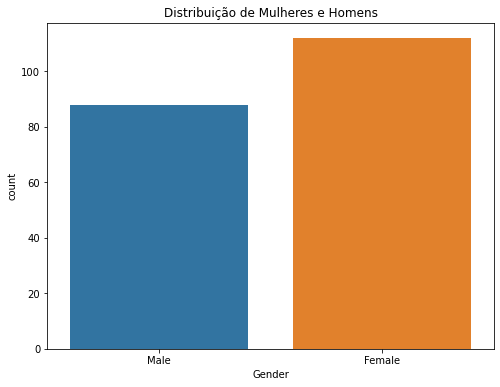

In [32]:
display(df['Gender'].value_counts())

plt.figure(figsize = (8,6))
sns.countplot(data = df, x = 'Gender')

plt.title('Distribuição de Mulheres e Homens', fontsize = 12);

Vamos plotar a distribuição de Renda Anual geral e por Gênero

C:\Users\user\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


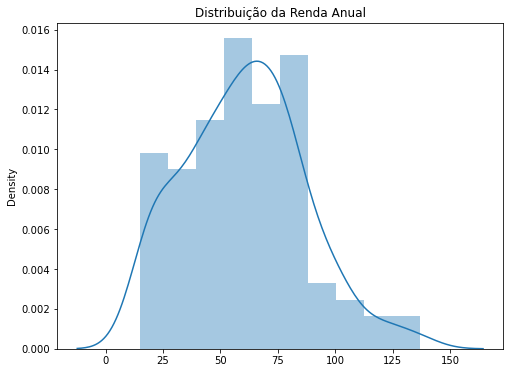

In [47]:
plt.figure(figsize = (8,6))
sns.distplot(x = df['Annual_income'])
plt.title('Distribuição da Renda Anual', fontsize = 12);

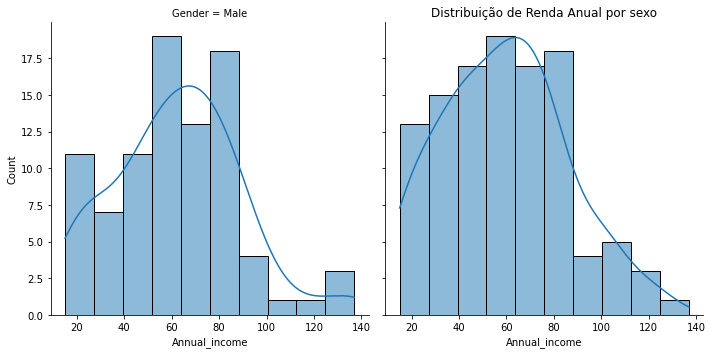

In [54]:
sns.displot(df, x = 'Annual_income', col = 'Gender', kde = True);
plt.title('Distribuição de Renda Anual por sexo');

Os dois gráficos apresentam uma cauda pra direita, significando que existem pessoas com uma renda anual mais alta..

Para ambos os sexos o ponto mais alto fica entre 60 e 80 de Renda Anual

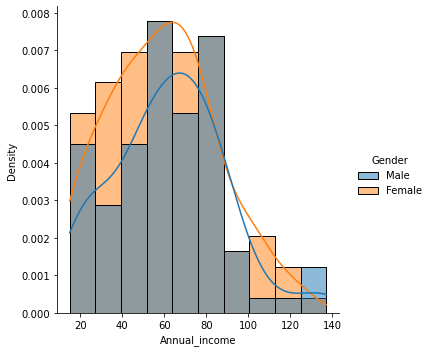

In [53]:
sns.displot(df, x="Annual_income", hue="Gender", stat="density", kde = True)

## esse gráfico achei bacana mas creio que prejudica o entendimento da distribuição

Vamos ver a distribuição agora de Spending Score

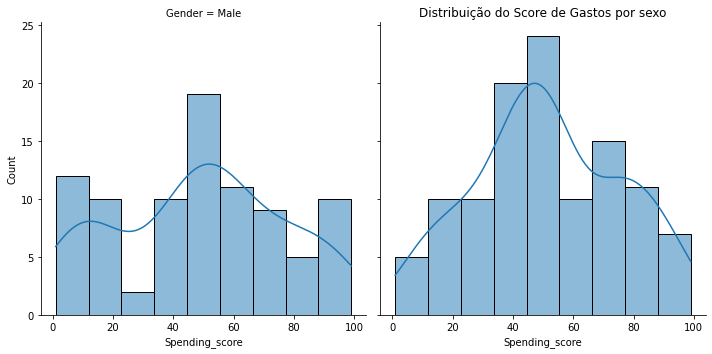

In [55]:
sns.displot(df, x = 'Spending_score', col = 'Gender', kde = True);
plt.title('Distribuição do Score de Gastos por sexo');

## Utilizando Pairplot

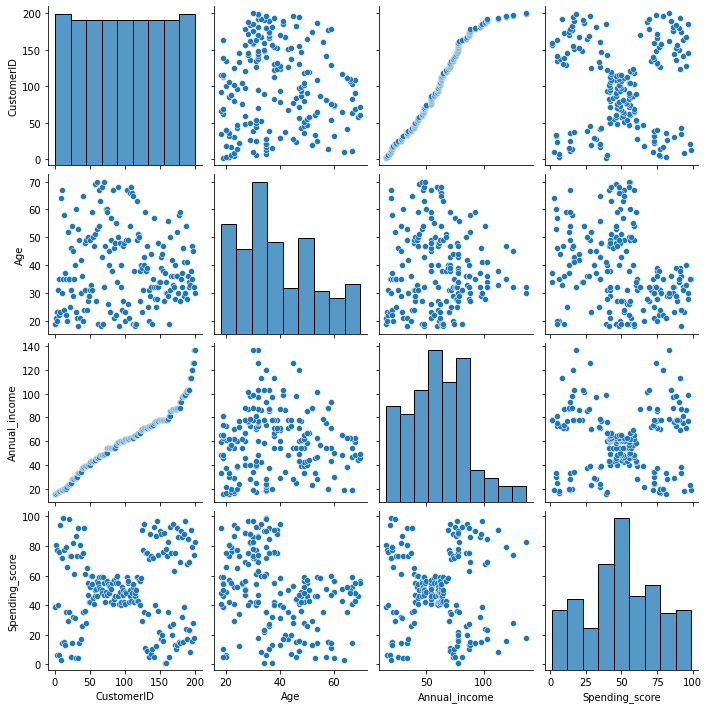

In [56]:
sns.pairplot(df)

Conseguimos visualizar que temos alguns clusters.... 

## Importando o sklearn

In [63]:
from sklearn.cluster import KMeans

In [64]:
# instanciando o modelom k = 4
estimador = KMeans(n_clusters = 4, max_iter = 1000)

In [66]:
## salvando a variável X

X = df.drop(columns = ['CustomerID','Gender'])

X.head()

,Age,Annual_income,Spending_score
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


In [67]:
## treinando o modelo
modelo = estimador.fit(X)

In [68]:
# aqui é criado as predições
clusters = modelo.predict(X)

In [69]:
## criando nova coluna com as predições
clustered_data = pd.concat([pd.DataFrame(X), pd.Series(clusters)], axis = 1)

## renomeando o nome da coluna
clustered_data.columns = ['Age','Annual_income','Spending_score','cluster']


In [70]:
clustered_data.head()

,Age,Annual_income,Spending_score,cluster
0,19,15,39,1
1,21,15,81,1
2,20,16,6,3
3,23,16,77,1
4,31,17,40,3


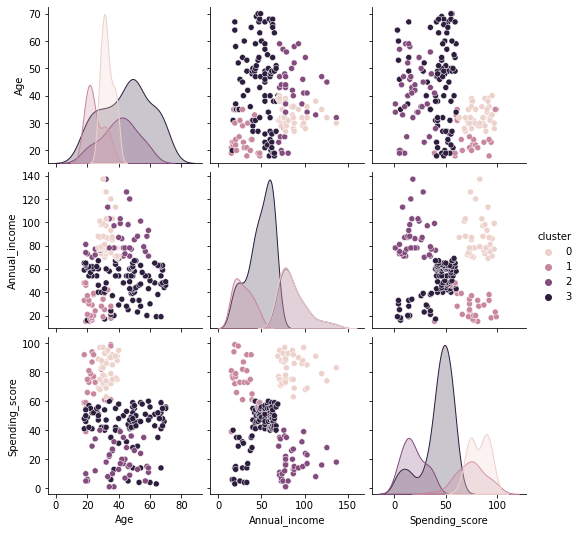

In [71]:
sns.pairplot(clustered_data, hue = 'cluster')

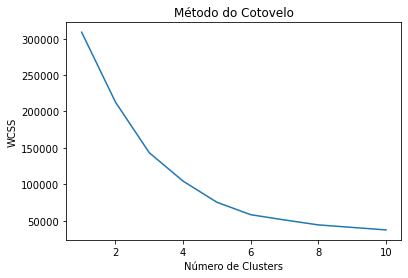

In [72]:
#inicializamos uma lista vazia para armazenar a inercia de cada modelo com um k diferente
#a inercia é a soma dos quadrados das distâncias dos pontos ao cluster mais próximo, e funciona como uma espécie de erro.
inercia = []

#criamos um iterável para os valores de k que vamos testar. Neste caso, testaremos de 1 a 10!
lista_k = range(1, 11)

#aqui vamos fitar o modelo e atualizar nossa lista de inercias
for k in lista_k:
    #aqui fitamos o modelo
    kmeans = KMeans(n_clusters=k).fit(X)
    
    #aqui apendamos a inercia do modelo com o k atual à nossa lista
    #a inerrcia é a propriedade ".inertia_" do modelo!
    inercia.append(kmeans.inertia_)

# Aqui plotamos a inercia em função do k!
plt.plot(range(1, 11), inercia)
plt.title('Método do Cotovelo')
plt.xlabel('Número de Clusters')
#a inercia também é chamada de WCSS
plt.ylabel('WCSS')
plt.show()

## Talvez a melhor quantidade de cluster é com 6 ?

In [81]:
# instanciando o modelom k = 6
estimador2 = KMeans(n_clusters = 6, max_iter = 1000)


X2 = df.drop(columns = ['CustomerID','Gender'])

X2.head()

## treinando o modelo
modelo2 = estimador2.fit(X2)



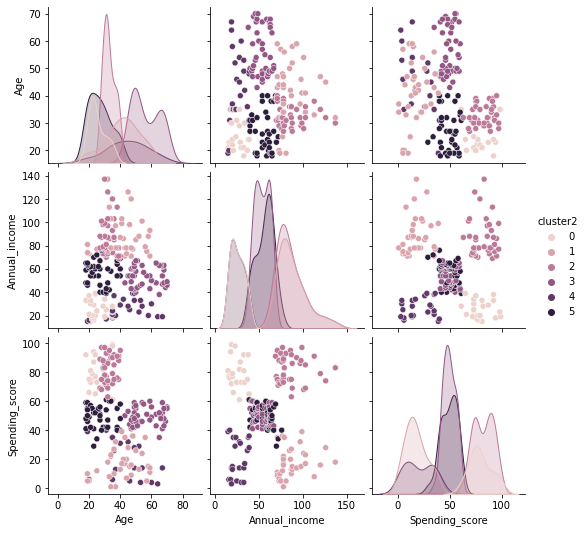

In [82]:
# aqui é criado as predições
clusters2 = modelo2.predict(X2)


## criando nova coluna com as predições
clustered_data2 = pd.concat([pd.DataFrame(X2), pd.Series(clusters2)], axis = 1)

## renomeando o nome da coluna
clustered_data2.columns = ['Age','Annual_income','Spending_score','cluster2']

sns.pairplot(clustered_data2, hue = 'cluster2')